<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/news_nao_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recherche d'articles de News via une API
- Site https://newsapi.org/
- Mise à jour automatique dans l'URL de l'API de la date et du thème choisi : Karaté
- création d'un dataframe

In [207]:
# importer les données depuis une API avec un thème plus précis : le karaté

import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey={API_KEY}"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
      
df


,source,author,title,description,url,urlToImage,publishedAt,content
0,Eurogamer.net,Tom Phillips,GTA producer's not-crypto project Everywhere i...,In a former casino on the outskirts of Edinbur...,https://www.eurogamer.net/gta-producers-not-cr...,https://assets.reedpopcdn.com/EVERYWHERE-(4).j...,2023-03-23T14:00:00Z,In a former casino on the outskirts of Edinbur...
1,Süddeutsche Zeitung,"Von David Pfeifer, Bangkok",Gesellschaft: Irgendwie asiatisch,"Nach dem Erfolg von ""Everything Everywhere All...",https://www.sueddeutsche.de/panorama/asien-osc...,https://www.sueddeutsche.de/image/sz.1.5774194...,2023-03-23T12:43:20Z,"Nach dem Erfolg von ""Everything Everywhere All..."
2,Business Today,Business Today Desk,‘Koi kuch nahi ukhad sakta…’: Ashneer Grover r...,The controversial entrepreneur and investor sa...,https://www.businesstoday.in/entrepreneurship/...,https://akm-img-a-in.tosshub.com/businesstoday...,2023-03-23T11:09:46Z,There is nothing to be scared of when it comes...
3,Andro4all.com,Esteban García Marcos,Las dos novedades de Amazon Prime Video que no...,Amazon Prime Video busca hacerse con el mercad...,https://andro4all.com/series/las-dos-novedades...,https://andro4all.com/hero/2023/03/perfect-add...,2023-03-23T11:00:09Z,Amazon Prime Video lo intenta con dos estrenos...
4,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23T08:22:39Z,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
...,...,...,...,...,...,...,...,...
428,Www.svt.se,SVT Nyheter,Sportläger för unga med funktionsvariation – J...,"Boccia, mattcurling, friidrott och karate var ...",https://www.svt.se/nyheter/lokalt/ost/sportlag...,https://www.svtstatic.se/image/custom/1200/387...,2023-02-23T17:39:45Z,"Det är Kompisföreningen Öst, en del av Fritids..."
429,MMA Mania,SethGeko,Krylov vs. Spann Breakdown,Twitter: @DadHallOfFamer \r\n\r\n\r\nWordpress...,https://www.mmamania.com/2023/2/23/23612095/kr...,https://cdn.vox-cdn.com/uploads/community/sbnu...,2023-02-23T17:38:54Z,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
430,Laut.de,Yannik Gölz,"""Sexy"" von Mehnersmoos","Es gibt derzeit niemanden, der Vergleichbares ...",https://www.laut.de/Mehnersmoos/Alben/Sexy-120168,https://www.laut.de/Mehnersmoos/Alben/Sexy-120...,2023-02-23T13:55:27Z,"laut.de-Kritik\r\nEs gibt derzeit niemanden, d..."
431,Dagospia.com,None,“SONO QUASI NONNO MA A 60 ANNI SOGNO ANCORA DI...,Estratto dell’intervista di Alberto Dandolo pe...,https://www.dagospia.com/rubrica-2/media_e_tv/...,https://cdn-static.dagospia.com/img/patch/02-2...,2023-02-23T12:21:19Z,Estratto dell’intervista di Alberto Dandolo pe...


In [156]:
# créer une boucle pour mettre à jour l'API automatiquement

from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  new_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

new_date

https://newsapi.org/v2/everything?q=karate&from=2023-3-24&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-23&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-22&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-21&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-20&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-19&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-18&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-17&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-16&sortBy

'https://newsapi.org/v2/everything?q=karate&from=2023-2-23&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473'

#Transfert du dataframe en CSV

In [157]:
# transformer le dataframe en csv

df.to_csv("output.csv")

data = pd.read_csv("output.csv")

#Analyse générale du contenu des articles
- merge des colonnes title & content & description
- création d'une colonne dans laquelle on insert le contenu post merge
- traduction en anglais du contenu
- analyse de mots à partir de ce merge : *wordcloud*

In [158]:
# clean content : on fait disparaitre le CHARS

for _ , row in df.iterrows():
  row['content'] = " ".join(row['content'].split(" ")[:-3])

df['content'][10]

'SOYAPANGO, El Salvador -- With semiautomatic weapons pressed to their chest, a pack of camouflage-clad police officers marches through rows of small brick homes winding up hills on the fringes of El'

In [159]:
df.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')

In [160]:
# merge columns : content + description + text

df['merge_text'] = df[["content", "title", "description"]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

df

,source,author,title,description,url,urlToImage,publishedAt,content,merge_text
0,Süddeutsche Zeitung,"Von David Pfeifer, Bangkok",Gesellschaft: Irgendwie asiatisch,"Nach dem Erfolg von ""Everything Everywhere All...",https://www.sueddeutsche.de/panorama/asien-osc...,https://www.sueddeutsche.de/image/sz.1.5774194...,2023-03-23T12:43:20Z,"Nach dem Erfolg von ""Everything Everywhere All...","Nach dem Erfolg von ""Everything Everywhere All..."
1,Business Today,Business Today Desk,‘Koi kuch nahi ukhad sakta…’: Ashneer Grover r...,The controversial entrepreneur and investor sa...,https://www.businesstoday.in/entrepreneurship/...,https://akm-img-a-in.tosshub.com/businesstoday...,2023-03-23T11:09:46Z,There is nothing to be scared of when it comes...,There is nothing to be scared of when it comes...
2,Andro4all.com,Esteban García Marcos,Las dos novedades de Amazon Prime Video que no...,Amazon Prime Video busca hacerse con el mercad...,https://andro4all.com/series/las-dos-novedades...,https://andro4all.com/hero/2023/03/perfect-add...,2023-03-23T11:00:09Z,Amazon Prime Video lo intenta con dos estrenos...,Amazon Prime Video lo intenta con dos estrenos...
3,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23T08:22:39Z,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio...","ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
4,Thehillstimes.in,The Hills Times,HSOA And MDKS Organise Felicitation Programme.,"HT Correspondent MORIGAON, March 22: Hapkido S...",https://thehillstimes.in/assam/hsoa-and-mdks-o...,https://thehillstimes.in/wp-content/uploads/20...,2023-03-23T01:15:38Z,"HT Correspondent\r\nMORIGAON, March 22: Hapkid...","HT Correspondent\r\nMORIGAON, March 22: Hapkid..."
...,...,...,...,...,...,...,...,...,...
427,Www.svt.se,SVT Nyheter,Sportläger för unga med funktionsvariation – J...,"Boccia, mattcurling, friidrott och karate var ...",https://www.svt.se/nyheter/lokalt/ost/sportlag...,https://www.svtstatic.se/image/custom/1200/387...,2023-02-23T17:39:45Z,"Det är Kompisföreningen Öst, en del av Fritids...","Det är Kompisföreningen Öst, en del av Fritids..."
428,MMA Mania,SethGeko,Krylov vs. Spann Breakdown,Twitter: @DadHallOfFamer \r\n\r\n\r\nWordpress...,https://www.mmamania.com/2023/2/23/23612095/kr...,https://cdn.vox-cdn.com/uploads/community/sbnu...,2023-02-23T17:38:54Z,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
429,Laut.de,Yannik Gölz,"""Sexy"" von Mehnersmoos","Es gibt derzeit niemanden, der Vergleichbares ...",https://www.laut.de/Mehnersmoos/Alben/Sexy-120168,https://www.laut.de/Mehnersmoos/Alben/Sexy-120...,2023-02-23T13:55:27Z,"laut.de-Kritik\r\nEs gibt derzeit niemanden, d...","laut.de-Kritik\r\nEs gibt derzeit niemanden, d..."
430,Dagospia.com,None,“SONO QUASI NONNO MA A 60 ANNI SOGNO ANCORA DI...,Estratto dell’intervista di Alberto Dandolo pe...,https://www.dagospia.com/rubrica-2/media_e_tv/...,https://cdn-static.dagospia.com/img/patch/02-2...,2023-02-23T12:21:19Z,Estratto dell’intervista di Alberto Dandolo pe...,Estratto dell’intervista di Alberto Dandolo pe...


In [161]:
df["title"][0]

'Gesellschaft: Irgendwie asiatisch'

In [162]:
df["content"][0]

'Nach dem Erfolg von "Everything Everywhere All at Once": Die diesjährige Oscar-Verleihung wurde als Triumph von Künstlern aus Fernost gefeiert - aber was bedeutet das eigentlich?Es lohnt sich, von'

In [163]:
df["merge_text"][0]

'Nach dem Erfolg von "Everything Everywhere All at Once": Die diesjährige Oscar-Verleihung wurde als Triumph von Künstlern aus Fernost gefeiert - aber was bedeutet das eigentlich?Es lohnt sich, von,Gesellschaft: Irgendwie asiatisch,Nach dem Erfolg von "Everything Everywhere All at Once": Die diesjährige Oscar-Verleihung wurde als Triumph von Künstlern aus Fernost gefeiert - aber was bedeutet das eigentlich?'

In [164]:
#traduction du merge text en anglais

!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

GoogleTranslator(source='auto', target='english').translate(df["merge_text"][11])


for index , row in tqdm(df.iterrows()):
  row["merge_text"] = GoogleTranslator(source='auto', target='english').translate(df["merge_text"][index])

df["merge_text"]

432it [01:47,  4.03it/s]


0      After the success of "Everything Everywhere Al...
1      There is nothing to be scared of when it comes...
2      Amazon Prime Video tries it with two premieres...
3      ENTERTAINMENT\r\nIn the last two "Mission: Imp...
4      HT Correspondent\r\nMORIGAON, March 22: Hapkid...
                             ...                        
427    It is Kompisföreningen Öst, part of the Fritid...
428    Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
429    loud.de criticism\r\nThere is currently no one...
430    Extract from the interview by Alberto Dandolo ...
431    Do you want to read naTemat.pl without ads and...
Name: merge_text, Length: 432, dtype: object

In [166]:
df["merge_text"][0]

'After the success of "Everything Everywhere All at Once": This year\'s Oscars were hailed as a triumph for artists from the Far East - but what does that actually mean? All at Once": This year\'s Oscars were celebrated as a triumph for artists from the Far East - but what does that actually mean?'

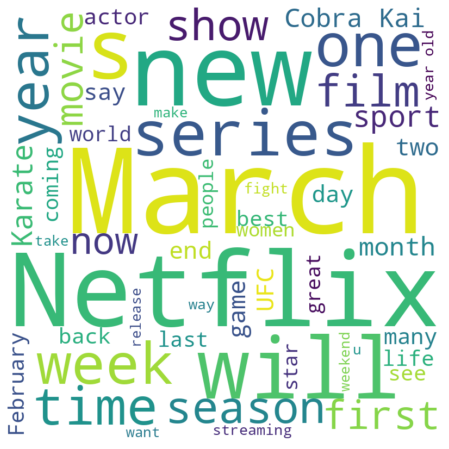

In [167]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df["merge_text"])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=STOPWORDS, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#DATAFRAME CLEANING
- Changement format de la date
- Transformation de la date en jour de la semaine
- Comptabilisation de la publication des articles par semaine

In [208]:
# formater la colonne 'publishedAt'

df['publishedAt'] = pd.to_datetime(df['publishedAt'])

jour_de_la_semaine = df['publishedAt'].dt.strftime("%A")

df['jourdelasemaine']=df['publishedAt'].dt.strftime("%A")
df['publishedAt'] = df['publishedAt'].dt.strftime('%d/%m/%Y')
df['publishedAt']
df['jourdelasemaine']

0      Thursday
1      Thursday
2      Thursday
3      Thursday
4      Thursday
         ...   
428    Thursday
429    Thursday
430    Thursday
431    Thursday
432    Thursday
Name: jourdelasemaine, Length: 433, dtype: object

In [169]:
df

,source,author,title,description,url,urlToImage,publishedAt,content,merge_text,jourdelasemaine
0,Süddeutsche Zeitung,"Von David Pfeifer, Bangkok",Gesellschaft: Irgendwie asiatisch,"Nach dem Erfolg von ""Everything Everywhere All...",https://www.sueddeutsche.de/panorama/asien-osc...,https://www.sueddeutsche.de/image/sz.1.5774194...,23/03/2023,"Nach dem Erfolg von ""Everything Everywhere All...","After the success of ""Everything Everywhere Al...",Thursday
1,Business Today,Business Today Desk,‘Koi kuch nahi ukhad sakta…’: Ashneer Grover r...,The controversial entrepreneur and investor sa...,https://www.businesstoday.in/entrepreneurship/...,https://akm-img-a-in.tosshub.com/businesstoday...,23/03/2023,There is nothing to be scared of when it comes...,There is nothing to be scared of when it comes...,Thursday
2,Andro4all.com,Esteban García Marcos,Las dos novedades de Amazon Prime Video que no...,Amazon Prime Video busca hacerse con el mercad...,https://andro4all.com/series/las-dos-novedades...,https://andro4all.com/hero/2023/03/perfect-add...,23/03/2023,Amazon Prime Video lo intenta con dos estrenos...,Amazon Prime Video tries it with two premieres...,Thursday
3,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,23/03/2023,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio...","ENTERTAINMENT\r\nIn the last two ""Mission: Imp...",Thursday
4,Thehillstimes.in,The Hills Times,HSOA And MDKS Organise Felicitation Programme.,"HT Correspondent MORIGAON, March 22: Hapkido S...",https://thehillstimes.in/assam/hsoa-and-mdks-o...,https://thehillstimes.in/wp-content/uploads/20...,23/03/2023,"HT Correspondent\r\nMORIGAON, March 22: Hapkid...","HT Correspondent\r\nMORIGAON, March 22: Hapkid...",Thursday
...,...,...,...,...,...,...,...,...,...,...
427,Www.svt.se,SVT Nyheter,Sportläger för unga med funktionsvariation – J...,"Boccia, mattcurling, friidrott och karate var ...",https://www.svt.se/nyheter/lokalt/ost/sportlag...,https://www.svtstatic.se/image/custom/1200/387...,23/02/2023,"Det är Kompisföreningen Öst, en del av Fritids...","It is Kompisföreningen Öst, part of the Fritid...",Thursday
428,MMA Mania,SethGeko,Krylov vs. Spann Breakdown,Twitter: @DadHallOfFamer \r\n\r\n\r\nWordpress...,https://www.mmamania.com/2023/2/23/23612095/kr...,https://cdn.vox-cdn.com/uploads/community/sbnu...,23/02/2023,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...,Thursday
429,Laut.de,Yannik Gölz,"""Sexy"" von Mehnersmoos","Es gibt derzeit niemanden, der Vergleichbares ...",https://www.laut.de/Mehnersmoos/Alben/Sexy-120168,https://www.laut.de/Mehnersmoos/Alben/Sexy-120...,23/02/2023,"laut.de-Kritik\r\nEs gibt derzeit niemanden, d...",loud.de criticism\r\nThere is currently no one...,Thursday
430,Dagospia.com,None,“SONO QUASI NONNO MA A 60 ANNI SOGNO ANCORA DI...,Estratto dell’intervista di Alberto Dandolo pe...,https://www.dagospia.com/rubrica-2/media_e_tv/...,https://cdn-static.dagospia.com/img/patch/02-2...,23/02/2023,Estratto dell’intervista di Alberto Dandolo pe...,Extract from the interview by Alberto Dandolo ...,Thursday


In [170]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_grouped = df.resample('W', on='publishedAt').size().reset_index(name='count')
df_grouped


/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '22/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime

,publishedAt,count
0,2023-01-08,20
1,2023-01-15,0
2,2023-01-22,0
3,2023-01-29,0
4,2023-02-05,22
5,2023-02-12,0
6,2023-02-19,0
7,2023-02-26,54
8,2023-03-05,67
9,2023-03-12,0


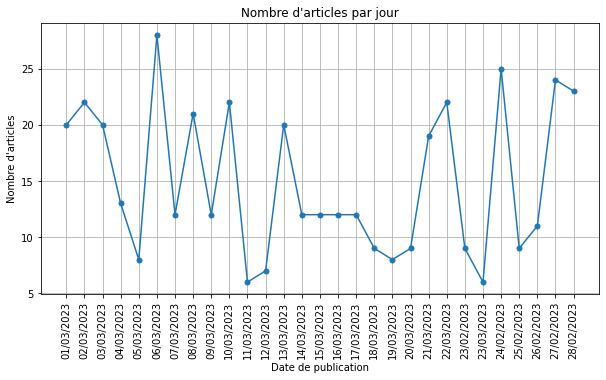

In [230]:
# Grouper les données par jour et compter le nombre d'articles
daily_counts = df.groupby("publishedAt")["content"].count()

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', markersize=5)
plt.xlabel("Date de publication")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles par jour")
plt.grid()

plt.xticks(daily_counts.index, rotation=90)

# Afficher le graphique
plt.show()

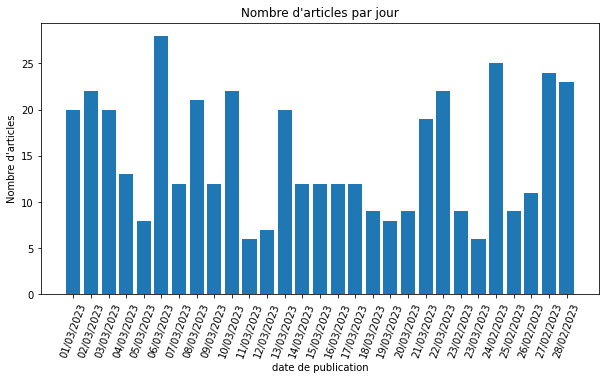

In [231]:
# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.bar(daily_counts.index, daily_counts.values)
plt.xlabel("date de publication")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles par jour")

plt.xticks(daily_counts.index, rotation=70)

# Afficher le graphique
plt.show()

In [219]:
df["publishedAt"]

0      23/03/2023
1      23/03/2023
2      23/03/2023
3      23/03/2023
4      23/03/2023
          ...    
428    23/02/2023
429    23/02/2023
430    23/02/2023
431    23/02/2023
432    23/02/2023
Name: publishedAt, Length: 433, dtype: object

jourdelasemaine
Friday       79
Monday       81
Saturday     37
Sunday       34
Thursday     61
Tuesday      66
Wednesday    75
Name: content, dtype: int64


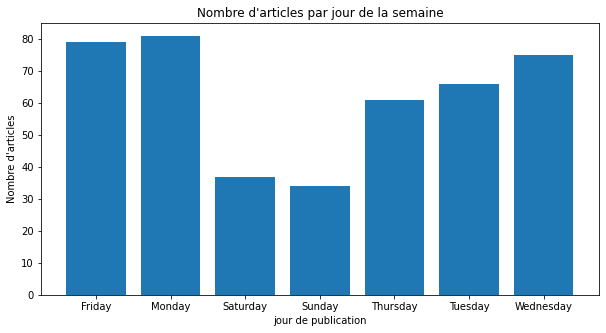

In [232]:
#diagramme par jour de la semaine

daily_counts = df.groupby("jourdelasemaine")["content"].count()
print(daily_counts)

plt.figure(figsize=(10, 5))
plt.bar(daily_counts.index, daily_counts.values)
plt.xlabel("jour de publication")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles par jour de la semaine")


# Afficher le graphique
plt.show()


# Analyse NETFLIX

In [184]:
# import de pandas
import pandas as pd

# chargement de votre dataframe
df = pd.read_csv('output.csv')

# spécification de la colonne dans laquelle rechercher le mot
colonne = 'content'

# spécification du mot à rechercher
mot = 'Netflix'

# utilisation de la méthode str.contains() pour créer un masque de booléens
masque = df[colonne].str.contains(mot)

# comptage des articles correspondants
nombre_articles = masque.sum()

# affichage du résultat
print(f"Il y a {nombre_articles} articles dans le dataframe contenant le mot '{mot}' dans la colonne '{colonne}'.")

Il y a 50 articles dans le dataframe contenant le mot 'Netflix' dans la colonne 'content'.


In [185]:
import pandas as pd

# Filtrer les articles contenant le mot "Netflix"
articles_contenant_mot = df[df['content'].str.contains('Netflix')]

# Convertir la colonne "publishedAt" en objet datetime et extraire la date
df['date'] = pd.to_datetime(df['publishedAt']).dt.date

# Regrouper les articles par date et compter le nombre d'articles par date
articles_par_date = articles_contenant_mot.groupby(df['date']).size().reset_index(name='nb_articles')

# Afficher les résultats
articles_par_date

,date,nb_articles
0,2023-02-23,2
1,2023-02-24,1
2,2023-02-26,2
3,2023-02-27,6
4,2023-02-28,10
5,2023-03-01,8
6,2023-03-02,4
7,2023-03-03,4
8,2023-03-05,3
9,2023-03-06,3


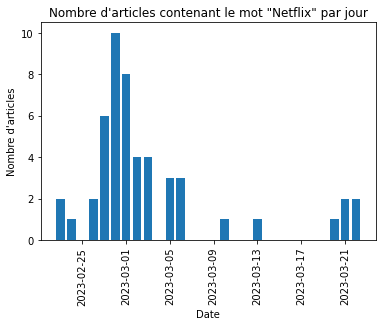

In [186]:
import matplotlib.pyplot as plt

# Tracer un graphique en barres du nombre d'articles par jour
plt.bar(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter un titre et des étiquettes d'axe
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')

# Faire pivoter les étiquettes de l'axe x pour les rendre lisibles
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


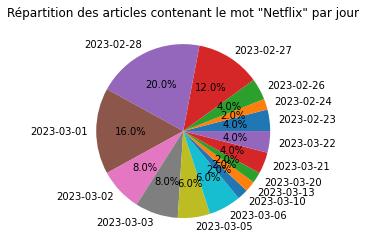

In [187]:
import matplotlib.pyplot as plt

# Tracer un graphique circulaire
plt.pie(articles_par_date['nb_articles'], labels=articles_par_date['date'], autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


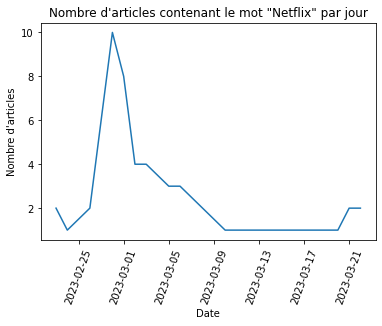

In [188]:
import matplotlib.pyplot as plt

# Tracer un graphique linéaire
plt.plot(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


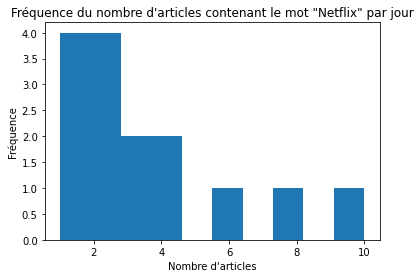

In [189]:
import matplotlib.pyplot as plt

# Tracer un histogramme
plt.hist(articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Nombre d\'articles')
plt.ylabel('Fréquence')
plt.title('Fréquence du nombre d\'articles contenant le mot "Netflix" par jour')

# Afficher le graphique
plt.show()


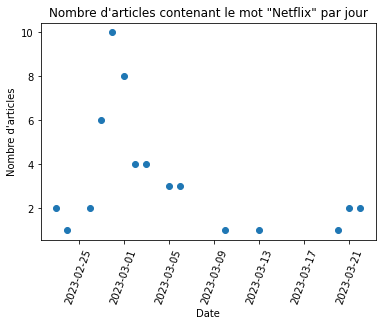

In [190]:
import matplotlib.pyplot as plt

# Tracer un nuage de points
plt.scatter(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


#Analyse des données sur les championnats du monde de Karaté

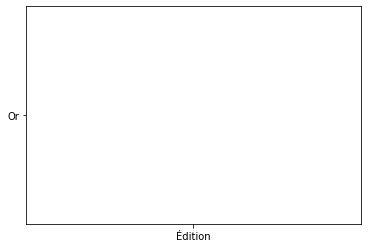

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv("KARATE.csv")

names = ['Édition'] # nom des barres
values = ['Or']
plt.bar('Édition','Or') ; plt.show() # Tracer

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv("KARATE.csv")

# Extraire les données pour les médailles d'or
gold = df['Or']

# Créer une liste de noms de pays correspondant aux données
names = list(df['Pays'])

# Créer le graphique à barres
plt.bar(names, gold)

KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df =pd.read_csv("KARATE.csv")

# Calcul du total pour chaque catégorie
totals = df.groupby('Édition')['Total'].sum()

# Création du graphique camembert à partir des totaux
plt.bar(totals, labels=totals.index)

plt.show()

#Analyse des données sur la Karaté

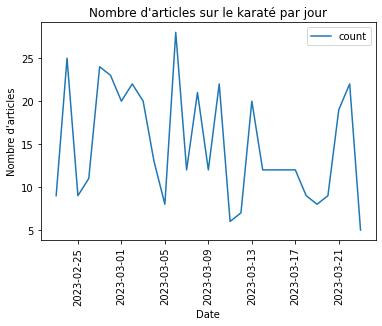

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('output.csv')
df['publishedAt'] = pd.to_datetime(df['publishedAt']).dt.date
articles_per_day = df.groupby('publishedAt').size().reset_index(name='count')
articles_per_day.plot(x='publishedAt', y='count')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur le karaté par jour')
plt.xticks(rotation=90)



plt.show()



In [192]:
# Search for articles about karate movies
df_films = df[df['title'].str.contains('film|cinéma|acteur', case=False)]

# Display results
df_films


,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
3,3,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
21,21,Sorrisi.com,Stefano Gradi,"Da “The night agent” a “Christian”, i nuovi fi...","Cosa vedere dal 22 al 28 marzo su Netflix, Pri...",https://www.sorrisi.com/tv/da-the-night-agent-...,https://www.sorrisi.com/wp-content/uploads/202...,2023-03-22,"Cosa vedere dal 22 al 28 marzo su Netflix, Pri..."
178,178,Yahoo Entertainment,Local Journalism Initiative,Tiny is a short film about a strong woman,"​Ritchie Hemphill, ’Nakwaxda’xw, is a West Coa...",https://ca.news.yahoo.com/tiny-short-film-stro...,https://s.yimg.com/cv/apiv2/social/images/yaho...,2023-03-09,"Ritchie Hemphill, Nakwaxdaxw, is a West Coast ..."
232,232,Nowymarketing.pl,Nowy Marketing,Jake Gyllenhaal promuje remake filmu „Road Hou...,Gwiazdą gali UFC 285 był aktor Jake Gyllenhaal...,"https://nowymarketing.pl/a/41305,jake-gyllenha...",https://nowymarketing.pl/i/articles/41305_orig...,2023-03-06,Jake Gyllenhaal zaskakuje fanów MMA\r\nNa widz...
283,283,Www.nu.nl,Superguide,Nieuw op Netflix: Deze films en series versche...,Elke week breidt Netflix het aanbod uit met ni...,https://www.nu.nl/film/6253751/nieuw-op-netfli...,https://media.nu.nl/m/fwuxmh6a9vaq_wd1280/nieu...,2023-03-03,Elke week breidt Netflix het aanbod uit met ni...
285,285,Slickdeals.net,Discombobulated,The Karate Kid (1984) (4K UHD Digital Film; MA...,"Amazon \n \nFor those interested \n \nNote, be...",https://slickdeals.net/f/16487029-the-karate-k...,https://static.slickdealscdn.com/attachment/8/...,2023-03-03,"Amazon\r\nFor those interested\r\nNote, be sur..."
307,307,Interia.pl,Radosław Nawrot,Broad Peak to historia na wstrząsający film. C...,"Kiedy w zeszłym roku wszedł na ekrany film ""Br...",https://sport.interia.pl/gory/news-broad-peak-...,https://i.iplsc.com/-/000GTHOWYE6NRU2Q-C429.jpg,2023-03-02,"Film ""Broad Peak"" stanowi pewien przeom. Na te..."
347,347,Leganerd.com,Davide Mirabello,Netflix marzo 2023: tutti i film e le serie TV...,"Ecco tutte le novità di marzo 203 su Netflix, ...",https://leganerd.com/2023/02/28/netflix-marzo-...,https://leganerd.com/wp-content/uploads/2023/0...,2023-02-28,"Ecco tutte le novità di marzo 203 su Netflix, ..."
373,373,Everyeye.it,Mattia Manneschi,"Sky e NOW, da Elvis a Bones and All: ecco i fi...","Il biopic di Elvis, le inquietanti atmosfere d...",https://cinema.everyeye.it/articoli/rubrica-sk...,https://images.everyeye.it/img-articoli/sky-no...,2023-02-27,"Elvis di Baz Luhrmann, il riuscitissimo biopic..."
397,397,Cineblog.it,Pietro Ferraro,Beyond Redemption: trailer e anticipazioni del...,"Tutto quello che c'è da sapere su ""Beyond Rede...",https://www.cineblog.it/post/beyond-redemption...,https://www.blogo.it/app/uploads/sites/3/2023/...,2023-02-25,"E uscito negli Stati Uniti, direttamente in Bl..."


In [193]:
df_grouped = df.groupby('publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-23,9
1,2023-02-24,25
2,2023-02-25,9
3,2023-02-26,11
4,2023-02-27,24
5,2023-02-28,23
6,2023-03-01,20
7,2023-03-02,22
8,2023-03-03,20
9,2023-03-04,13


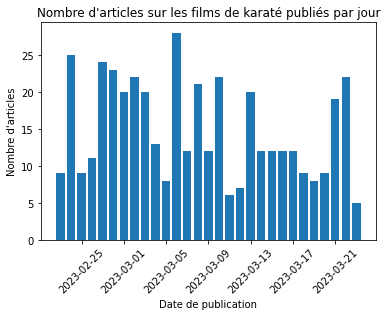

In [194]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Date de publication')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté publiés par jour')
plt.xticks(rotation=45)
plt.show()


In [195]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_grouped = df.resample('W', on='publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-26,54
1,2023-03-05,130
2,2023-03-12,108
3,2023-03-19,85
4,2023-03-26,55


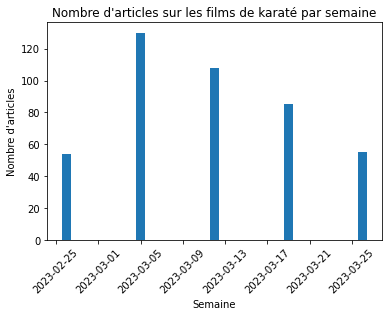

In [196]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Semaine')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté par semaine')
plt.xticks(rotation=45)
plt.show()



#Analyse mots positifs
Le but de cette recherche était de savoir si les articles  de l'API était majortirairement positif ou négatif

In [198]:
# Mots positifs articles Karaté

# hide the outputs
%%capture

# install transformers
!pip install transformers
!pip install sacremoses
!pip install sentencepiece

In [199]:
from transformers import pipeline


In [200]:
classifier = pipeline("zero-shot-classification")

sequence = "content"
candidate_labels = ["postive", "negative"]

classifier(sequence, candidate_labels)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'content',
 'labels': ['postive', 'negative'],
 'scores': [0.9752210974693298, 0.024778882041573524]}

Le résultat obtenu en dessous affiche en décimal que les articles  de l'API utilisent majoritairement des mots positifs. 

Il était préférable que le résultat apparaisse en pourcentage. **texte en gras**

In [201]:
#Faire une boucle For por l'appliquer à toute l'API

import requests
from transformers import pipeline

# récupérer la liste des URL d'articles depuis l'API
url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey"
response = requests.get(url)
liste_articles = response.json()

# initialiser le modèle de classification zéro-shot
classifier = pipeline("zero-shot-classification")

# définir les étiquettes candidates
candidate_labels = ["positive", "negative"]

# parcourir la liste des URL d'articles et classer le sentiment de chaque article

for content in liste_articles:
    # récupérer le texte de l'article depuis l'URL
    response = requests.get(url)
    text = response.text

    # classer le sentiment de l'article
    result = classifier(text, candidate_labels)

    # afficher les résultats
    print("Article:", url)
    print("Sentiment:", result["labels"][0])
    print("Score:", result["scores"][0])

    # Obtenir le résultat en pourcentage
    print("Score:", round(result["scores"][0]*100, 2), "%")

    #score_result = ["scores"]score_result




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Article: https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey
Sentiment: negative
Score: 0.997574508190155
Score: 99.76 %
Article: https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey
Sentiment: negative
Score: 0.997574508190155
Score: 99.76 %
Article: https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey
Sentiment: negative
Score: 0.997574508190155
Score: 99.76 %
